This file is used to plot the bitrate/resolution changes during the video downloading process as well as showing the distributions of the stats of the downloads.

The background of the plot will be shaded according to the video playback status: a light cyan background means the video is playing, while a light pink background means the video is buffering ("frozen").

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

def graph_tp(filename, title):
  df = pd.read_csv(filename)
  ax = df.plot()
  ax.set_xlabel("time")
  ax.set_ylabel("throughput")
  ax.set_title(title)

def graph(filename, color, title):
  c = {'INITIAL_BUFFERING': 'violet', 'PLAY': 'lightcyan', 'BUFFERING': 'lightpink'}

  dash = pd.read_csv(filename)
  dash = dash.loc[dash.CurrentPlaybackState.isin(c.keys() )]
  states = pd.DataFrame({'startState': dash.CurrentPlaybackState[0:-2].values, 'startTime': dash.EpochTime[0:-2].values,
                          'endState':  dash.CurrentPlaybackState[1:-1].values, 'endTime':   dash.EpochTime[1:-1].values})

  for index, s in states.iterrows():
    plt.axvspan(s['startTime'], s['endTime'],  color=c[s['startState']], alpha=1) 
  
  plt.plot(dash[dash.Action!="Writing"].EpochTime, dash[dash.Action!="Writing"].Bitrate, 'kx:', color=color)
  plt.ylabel("Video rate (bps)");
  plt.xlabel("Time (s)");
  plt.title(title);

def graph_all(filenames):
  for f in filenames:
    graph(f)
    plt.show()
  


Mounted at /content/drive/


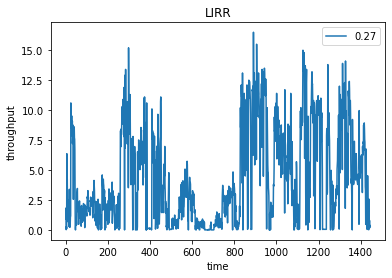

In [ ]:
graph_tp('./drive/MyDrive/CS655/AVA/Dataset/LIRR/Long_Island_Rail_Road.csv', title='LIRR')

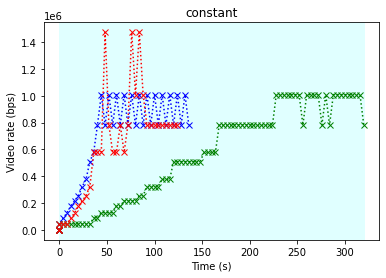

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/basic_constant.csv', 'blue', 'constant')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_cs.csv', 'green', 'constant')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_constant.csv', 'red', 'constant')

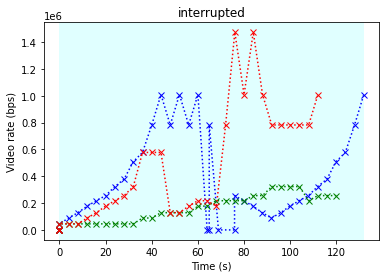

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_interrupted.csv', 'blue', 'interrupted')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_interrupted.csv', 'green', 'interrupted')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_interrupted.csv', 'red', 'interrupted')

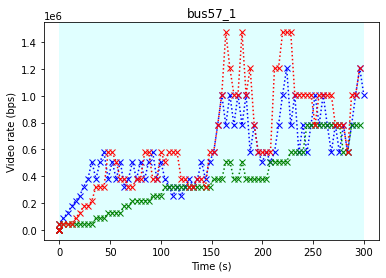

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_bus57_1.csv', 'blue', 'bus57_1')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_bus57_1.csv', 'green', 'bus57_1')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_bus57_1.csv', 'red', 'bus57_1')

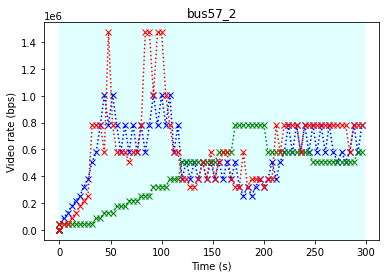

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_bus57_2.csv', 'blue', 'bus57_2')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_bus57_2.csv', 'green', 'bus57_2')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_bus57_2.csv', 'red', 'bus57_2')

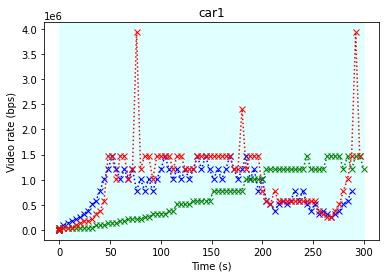

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_car1.csv', 'blue', 'car1')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_car1.csv', 'green', 'car1')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_car1.csv', 'red', 'car1')

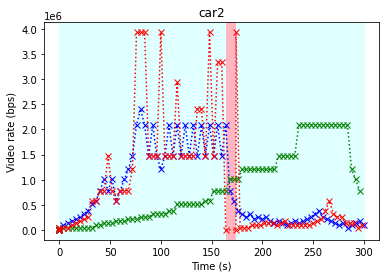

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_car2.csv', 'blue', 'car2')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_car2.csv', 'green', 'car2')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_car2.csv', 'red', 'car2')

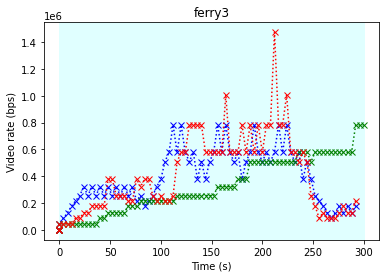

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_ferry3.csv', 'blue', 'ferry3')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_ferry3.csv', 'green', 'ferry3')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_ferry3.csv', 'red', 'ferry3')

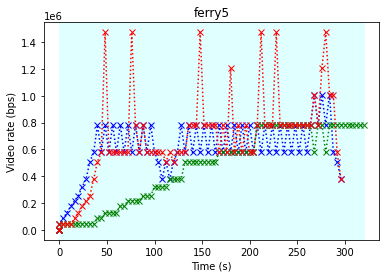

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_ferry5.csv', 'blue', 'ferry5')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_ferry5.csv', 'green', 'ferry5')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_ferry5.csv', 'red', 'ferry5')

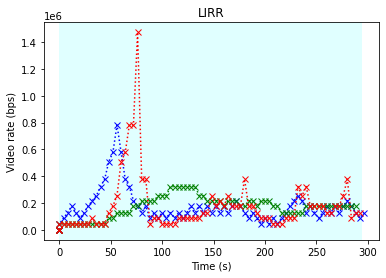

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_LIRR.csv', 'blue', 'LIRR')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_LIRR.csv', 'green', 'LIRR')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_LIRR.csv', 'red', 'LIRR')

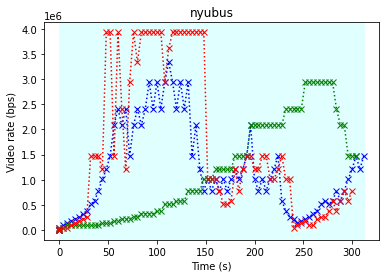

In [ ]:
graph('./drive/MyDrive/CS655/AVA/Basic/BASIC_nyubus.csv', 'blue', 'nyubus')
graph('./drive/MyDrive/CS655/AVA/Netflix/NETFLIX_nyubus.csv', 'green', 'nyubus')
graph('./drive/MyDrive/CS655/AVA/SARA/SARA_nyubus.csv', 'red', 'nyubus')

In [ ]:
# code to run avg & count
import pandas as pd
import matplotlib.pyplot as plt

# draw the throughput vs time
def draw_throughput(filename):
  df = pd.read_csv(filename)
  buffer = count_interrupts(df)
  lines = df.plot.line(x='time', y='throughput')

# count number of interrupts
def count_interrupts(df):
  try:
    buffer = df["CurrentPlaybackState"].value_counts().BUFFERING
    return buffer
  except:
    return 0

def show_stats(f1, f2, f3, tt):
  df1 = pd.read_csv(f1)
  df2 = pd.read_csv(f2)
  df3 = pd.read_csv(f3)


  buffer1 = count_interrupts(df1)
  buffer2 = count_interrupts(df2)
  buffer3 = count_interrupts(df3)

  # # stats about the bitrate
  # bitrate_stats = df["Bitrate"].describe()
  # min = df["Bitrate"].min()
  # max = df["Bitrate"].max()
  # std = df["Bitrate"].std()
  # avg = df["Bitrate"].mean()
  
  # plot the graph
  fig = plt.figure(figsize =(4,2))
  ax = fig.add_axes([0, 0, 1, 1])
  plt.title(tt)
  labels = ['basic', 'netflix', 'SARA']
  bp = ax.boxplot([df1["Bitrate"].to_numpy(dtype=object), df2["Bitrate"].to_numpy(dtype=object), df3["Bitrate"].to_numpy(dtype=object)], labels=labels)
  ax.set(ylabel='bitrate')
  
  plt.show()

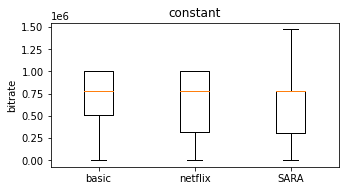

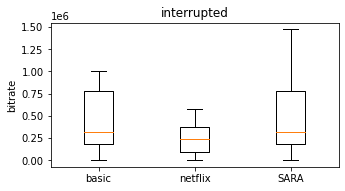

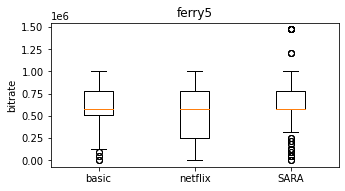

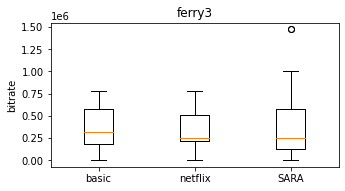

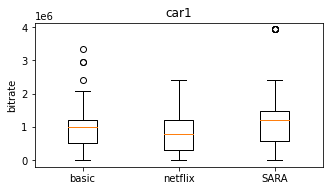

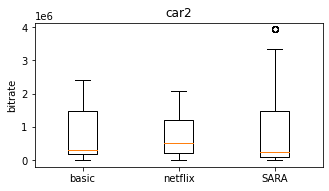

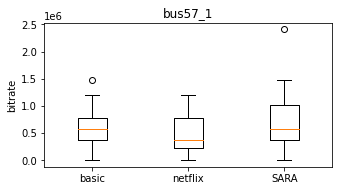

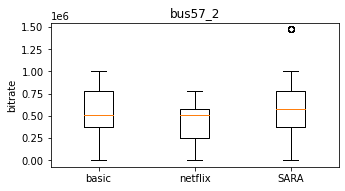

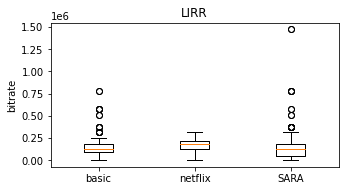

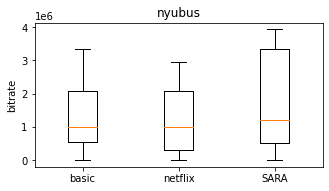

In [ ]:
import warnings
warnings.filterwarnings("ignore")

show_stats('./drive/MyDrive/CS655/AVA/Basic/basic_constant.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_cs.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_constant.csv', 'constant')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_interrupted.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_interrupted.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_interrupted.csv', 'interrupted')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_ferry5.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_ferry5.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_ferry5.csv', 'ferry5')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_ferry3.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_ferry3.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_ferry3.csv', 'ferry3')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_car1.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_car1.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_car1.csv', 'car1')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_car2.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_car2.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_car2.csv', 'car2')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_bus57_1.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_bus57_1.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_bus57_1.csv', 'bus57_1')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_bus57_2.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_bus57_2.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_bus57_2.csv', 'bus57_2')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_LIRR.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_LIRR.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_LIRR.csv', 'LIRR')
show_stats('./drive/MyDrive/CS655/AVA/Basic/BASIC_nyubus.csv', './drive/MyDrive/CS655/AVA/Netflix/NETFLIX_nyubus.csv', './drive/MyDrive/CS655/AVA/SARA/SARA_nyubus.csv', 'nyubus')